**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Taira Sakamoto
- Rachel Sakamoto
- Michelle Hong
- Briana Anongdeth
- Khristian-Rey Tamoria

# Research Question

What is the relative importance of social and economic factors in impacting the mean happiness levels of Asian and non-Asian countries, and how do they compare in their weight of influence in each group? What specific factors correlate with happiness within these regions?

## Background and Prior Work

Happiness is an intrinsic goal for individuals and government leaders, becoming a priority for the countries' researchers and policymakers. Due to this focus, the World Happiness Report (WHR) was created in 2012 to rank countries on their "national happiness", utilizing a national survey to do so.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) These rankings provide insight into the general well-being of a nation, shaped and contextualized by socioeconomoic and political factors. This project uses contextual data from WorldData.info in conjunction with the WHR to investigate the drivers of happiness across Asian countries as opposed to the rest of the world.

Previous works have explored this idea in multiple countries. For example, in China, education was found to have a significant impact on the happiness (and also economic) levels of the citizens. Furthermore, the level of education that an individual received had a consistent relationship with the level of happiness that they reported: higher education equated to stronger happiness scores.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) Moreover, a study among 166 developed/developing countries from 2005 to 2020 found that increased income generally had a positive effect on happiness, but in developing countries, this relationship forms an inverted U-shape, where excessive income resulted in a negative impact on happiness levels <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2).

__Issue__: Findings indicate that the factors are common for all countries and does not follow our research topic. Furthermore, it does not mention why we are separating Asian/non-Asian countries.

__Resolution__: Found another source that exemplifies the cultural differences between the regions that influences happiness levels within them.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Wikipedia contributors. (27 April 2025) World Happiness Report. In *Wikipedia, The Free Encyclopedia*. https://en.wikipedia.org/w/index.php?title=World_Happiness_Report&oldid=1287669446.
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Bahera et al. (2023). Socioeconomic determinants of happiness: Empirical evidence from developed and developing countries. *Journal of Behavioral and Experimental Economics*. https://www.sciencedirect.com/science/article/pii/S2214804324000272
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Yang et al. (2022). Education, Income, and Happiness: Evidence from China. *Frontiers in Public Health*. https://pmc.ncbi.nlm.nih.gov/articles/PMC9039002/pdf/fpubh-10-855327.pdf 


# Hypothesis



Seeing as Asian countries are known for their collectivist nature, we predict that the drivers of happiness in Asian countries will significantly differ from non-Asian countries in their relative importance. Specifically, certain factors such as economic stability, generosity, educational attainment, and social support are expected to have a stronger influence on their general happiness scores than their non-Asian counterparts. Previous studies have revealed that in countries like China, higher levels of education are associated with increased happiness, and that in developing countries, the link between income and happiness follows a non-linear pattern. These findings support the idea that cultural and economic contexts shape how happiness is driven and experienced across different regions. This study will utilize the statistical significance and regression coefficients of these drivers to understand the impact they have on each region's national happiness score.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: World Happiness Report 2015-2018
  - Link to the dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness/data
  - Number of observations: 626
  - Number of variables: 17, 12 when cleaned
- Dataset #2 (if you have more than one!)
  - Dataset Name: Educational attainment by level of education, cumulative (% population 25+)
  - Link to the dataset: https://genderdata.worldbank.org/en/indicator/se-cuat-zs?gender=total&education=At+least+Bachelor%27s+or+equivalent
  - Number of observations: 217
  - Number of variables: 6

**World Happiness Report 2015-2018:**
An anonymized and publicly accessible survey measuring the average happiness levels of citizens within ~156 countries per year, coupled with key variables that contribute to this overall score, such as **economic (GDP per Capita) and social (social support, generosity, and freedom to make life choices)** factors. These variables are not independent, but rather, components that are incorporated into the calculation of the happiness score. The variables are scored on a scale from 0-10, as proxies for national well-being and quality of life. These features will help test our hypothesis about the differences in the importance of these factors between Asian and non-Asian countries. Environmental factors are not available in the dataset, thus it is outside the scope of this study.

The dataset requires columns/variables to be dropped (due to inconsistent data across years; some were less relevant to our research question; redundancy), merging mismatched column names, and adding a categorical column of each country as "Asian" or "Non-Asian" based on its region in the world.

**Educational attainment by level of education, cumulative (% population 25+):**
An anonymized and publicly accessible dataset that provides the percentage of individuals within a country (aged 25 and older) that have completed a bachelor's degree or higher in 217 countries. Key variables include the country, year, and percentage, which is a numerical value that corresponds to the proportion of the population that has completed undergraduate education.  This dataset is treated as a separate measure of national development, distinct from the factors in the happiness dataset. The dataset needs irrelevant columns to be dropped.

**Merging the datasets:**
We plan to merge the datasets at some point in our study to study the relationship between education and happiness. We plan to utilize the common "Country" variable to merge the two datasets together. This combined dataset will allow us to analyze how the proportion of citizens who have at least completed undergraduated education may be correlated with national happiness scores, and if it is weighed differently between Asian and Non-Asian countries. Given that the WHR variables represents contributors to a country's happiness, this study examines the variations between these factors and how they intersect with education across regions.

**Issue**: More clarity on what will be used to answer research question, mention why only particular features were chosen

**Resolution**: Explained what variables will be used to answer our research question and why some variables were dropped from our study.

In [49]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image, display
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind

## Dataset #1 (use name instead of number here)

In [50]:
# folder path with all the World Happiness Reports datasets
folder_path = 'WorldHappinessReports'

# file list
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# add a year column for organization
df_list = []
for file in files:
    year = os.path.splitext(file)[0][-4:] # takes the last 4 digits before .csv
    df = pd.read_csv(os.path.join(folder_path, file))

# align column names
    df.rename(columns={
        'Country': 'Country',
        'Country or region': 'Country',
        'Region': 'Region',
        'Happiness.Rank': 'Happiness Rank',
        'Overall rank': 'Happiness Rank',
        'Happiness.Score': 'Happiness Score',
        'Score': 'Happiness Score',
        'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
        'Economy_GDP_per_Capita': 'Economy (GDP per Capita)',
        'GDP per capita': 'Economy (GDP per Capita)',
        'Family': 'Social Support',
        'Social support': 'Social Support',
        'Health..Life.Expectancy.': 'Health (Life Expectancy)',
        'Health_Life_Expectancy': 'Health (Life Expectancy)',
        'Healthy life expectancy': 'Health (Life Expectancy)',
        'Freedom': 'Freedom to Make Life Choices',
        'Freedom to make life choices': 'Freedom to Make Life Choices',
        'Trust (Government Corruption)': 'Perceptions of Corruption',
        'Trust..Government.Corruption.': 'Perceptions of Corruption',
        'Perceptions of corruption': 'Perceptions of Corruption',
        'Generosity': 'Generosity',
        'Dystopia Residual': 'Dystopia Residual',
        'Dystopia.Residual': 'Dystopia Residual'
    }, inplace=True)
    
    df['year'] = int(year)
    df_list.append(df)

# combine into a single DataFrame
df_combined = pd.concat(df_list, ignore_index=True)

# check columns with null values
# df_combined.isnull().sum()

# remove unnecessary columns
columns_to_drop = [
    'Standard Error',
    'Lower Confidence Interval',
    'Upper Confidence Interval',
    'Whisker.high',
    'Whisker.low',
    'Dystopia Residual'
]

df_clean = df_combined.drop(columns=columns_to_drop, errors='ignore')
df_clean.isnull().sum()

# check for country/region names
df_clean['Country'].unique()
df_clean['Region'].unique()


array([nan, 'Western Europe', 'North America',
       'Australia and New Zealand', 'Middle East and Northern Africa',
       'Latin America and Caribbean', 'Southeastern Asia',
       'Central and Eastern Europe', 'Eastern Asia', 'Sub-Saharan Africa',
       'Southern Asia'], dtype=object)

In [51]:
# designating countries to region
country_region_map = {
    'Switzerland': 'Western Europe',
    'Iceland': 'Western Europe',
    'Denmark': 'Western Europe',
    'Norway': 'Western Europe',
    'Finland': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Sweden': 'Western Europe',
    'Austria': 'Western Europe',
    'Germany': 'Western Europe',
    'Ireland': 'Western Europe',
    'Belgium': 'Western Europe',
    'Luxembourg': 'Western Europe',
    'United Kingdom': 'Western Europe',
    'France': 'Western Europe',
    'Spain': 'Western Europe',
    'Malta': 'Western Europe',
    'Italy': 'Western Europe',
    'Portugal': 'Western Europe',
    'Estonia': 'Western Europe',
    'Latvia': 'Western Europe',
    'Canada': 'North America',
    'United States': 'North America',
    'Mexico': 'North America',
    'Australia': 'Australia and New Zealand',
    'New Zealand': 'Australia and New Zealand',
    'Israel': 'Middle East and Northern Africa',
    'United Arab Emirates': 'Middle East and Northern Africa',
    'Oman': 'Middle East and Northern Africa',
    'Qatar': 'Middle East and Northern Africa',
    'Saudi Arabia': 'Middle East and Northern Africa',
    'Kuwait': 'Middle East and Northern Africa',
    'Bahrain': 'Middle East and Northern Africa',
    'Iran': 'Middle East and Northern Africa',
    'Iraq': 'Middle East and Northern Africa',
    'Lebanon': 'Middle East and Northern Africa',
    'Jordan': 'Middle East and Northern Africa',
    'Palestinian Territories': 'Middle East and Northern Africa',
    'Egypt': 'Middle East and Northern Africa',
    'Libya': 'Middle East and Northern Africa',
    'Tunisia': 'Middle East and Northern Africa',
    'Algeria': 'Middle East and Northern Africa',
    'Morocco': 'Middle East and Northern Africa',
    'Costa Rica': 'Latin America and Caribbean',
    'Brazil': 'Latin America and Caribbean',
    'Argentina': 'Latin America and Caribbean',
    'Panama': 'Latin America and Caribbean',
    'Chile': 'Latin America and Caribbean',
    'Colombia': 'Latin America and Caribbean',
    'Uruguay': 'Latin America and Caribbean',
    'Venezuela': 'Latin America and Caribbean',
    'Suriname': 'Latin America and Caribbean',
    'Trinidad and Tobago': 'Latin America and Caribbean',
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Dominican Republic': 'Latin America and Caribbean',
    'El Salvador': 'Latin America and Caribbean',
    'Guatemala': 'Latin America and Caribbean',
    'Honduras': 'Latin America and Caribbean',
    'Nicaragua': 'Latin America and Caribbean',
    'Paraguay': 'Latin America and Caribbean',
    'Peru': 'Latin America and Caribbean',
    'Ecuador': 'Latin America and Caribbean',
    'Bolivia': 'Latin America and Caribbean',
    'Belize': 'Latin America and Caribbean',
    'Jamaica': 'Latin America and Caribbean',
    'Haiti': 'Latin America and Caribbean',
    'Puerto Rico': 'Latin America and Caribbean',
    'Singapore': 'Southeastern Asia',
    'Thailand': 'Southeastern Asia',
    'Malaysia': 'Southeastern Asia',
    'Indonesia': 'Southeastern Asia',
    'Vietnam': 'Southeastern Asia',
    'Philippines': 'Southeastern Asia',
    'Laos': 'Southeastern Asia',
    'Myanmar': 'Southeastern Asia',
    'Cambodia': 'Southeastern Asia',
    'Japan': 'Eastern Asia',
    'South Korea': 'Eastern Asia',
    'Taiwan': 'Eastern Asia',
    'Taiwan Province of China': 'Eastern Asia',
    'Hong Kong': 'Eastern Asia',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'China': 'Eastern Asia',
    'Mongolia': 'Eastern Asia',
    'Czech Republic': 'Central and Eastern Europe',
    'Slovakia': 'Central and Eastern Europe',
    'Slovenia': 'Central and Eastern Europe',
    'Lithuania': 'Central and Eastern Europe',
    'Poland': 'Central and Eastern Europe',
    'Croatia': 'Central and Eastern Europe',
    'Russia': 'Central and Eastern Europe',
    'Belarus': 'Central and Eastern Europe',
    'Moldova': 'Central and Eastern Europe',
    'Hungary': 'Central and Eastern Europe',
    'Romania': 'Central and Eastern Europe',
    'Serbia': 'Central and Eastern Europe',
    'Ukraine': 'Central and Eastern Europe',
    'Montenegro': 'Central and Eastern Europe',
    'Bosnia and Herzegovina': 'Central and Eastern Europe',
    'Albania': 'Central and Eastern Europe',
    'Macedonia': 'Central and Eastern Europe',
    'Kosovo': 'Central and Eastern Europe',
    'Northern Cyprus': 'Central and Eastern Europe',
    'North Cyprus': 'Central and Eastern Europe',
    'Armenia': 'Central and Eastern Europe',
    'Georgia': 'Central and Eastern Europe',
    'Azerbaijan': 'Central and Eastern Europe',
    'India': 'Southern Asia',
    'Pakistan': 'Southern Asia',
    'Bangladesh': 'Southern Asia',
    'Nepal': 'Southern Asia',
    'Bhutan': 'Southern Asia',
    'Sri Lanka': 'Southern Asia',
    'Afghanistan': 'Southern Asia',
    'Maldives': 'Southern Asia',
    'Nigeria': 'Sub-Saharan Africa',
    'Ghana': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa',
    'Congo (Kinshasa)': 'Sub-Saharan Africa',
    'Zambia': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    'Rwanda': 'Sub-Saharan Africa',
    'Burundi': 'Sub-Saharan Africa',
    'Sierra Leone': 'Sub-Saharan Africa',
    'Togo': 'Sub-Saharan Africa',
    'Benin': 'Sub-Saharan Africa',
    'Mauritius': 'Sub-Saharan Africa',
    'Mauritania': 'Sub-Saharan Africa',
    'Djibouti': 'Sub-Saharan Africa',
    'Somalia': 'Sub-Saharan Africa',
    'Somaliland Region': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Tanzania': 'Sub-Saharan Africa',
    'Uzbekistan': 'Central Asia',
    'Turkmenistan': 'Central Asia',
    'Kazakhstan': 'Central Asia',
    'Cyprus': 'Eastern Europe',
    'Turkey': 'Eastern Europe',
    'Greece': 'Southern Europe',
    'Tajikistan': 'Central Asia',
    'Kyrgyzstan': 'Central Asia',
    'Bulgaria': 'Eastern Europe',
    'Cameroon': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa',
    'Gabon': 'Sub-Saharan Africa',
    'Congo (Brazzaville)': 'Sub-Saharan Africa',
    'Mali': 'Sub-Saharan Africa',
    'Ivory Coast': 'Sub-Saharan Africa',
    'Uganda': 'Sub-Saharan Africa',
    'Niger': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Chad': 'Sub-Saharan Africa',
    'Angola': 'Sub-Saharan Africa',
    'Botswana': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa',
    'Yemen': 'Middle East and Northern Africa',
    'Guinea': 'Sub-Saharan Africa',
    'Syria': 'Middle East and Northern Africa',
    'Central African Republic': 'Sub-Saharan Africa'
}

In [52]:
# apply the region to df
df_clean['Region'] = df_clean.apply(
    lambda row: country_region_map.get(row['Country'], row['Region']),
    axis=1
)

df_clean.head()

# group Asian and non-Asian countries together
df_clean['Asian'] = df_clean['Region'].apply(
    lambda x: 'Asian' if x in ['Eastern Asia', 'Southeastern Asia', 'Central Asia', 'Southern Asia'] else 'Non-Asian'
)

## Dataset #2 (if you have more than one, use name instead of number here)

In [53]:
# load dataset
education_df = pd.read_csv('Education/Educational attainment by level of education, cumulative (% population 25+).csv')

# remove any rows with null values
education_df = education_df.dropna()
education_df.isnull().sum()

# drop Economy Code column
education_df = education_df.drop(columns=['Economy Code'])

# rename "Economy" column to "Country"
education_df = education_df.rename(columns={'Economy':'Country', "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)": 'Percentage'})


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Social Factors and Happiness Levels

Exploring the effect that "Generosity" and "Freedom to Make Life Choices" has on the national happiness level of countries in each region.

First, we need to understand the counts of each region. Seeing as Asia represents a smaller proportion of the countries than Non-Asian countries in the world, it is important to understand the discrepancy in the counts of the data.

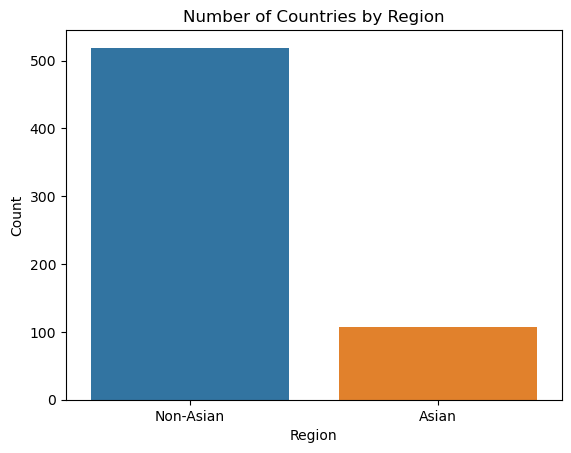

In [54]:
sns.countplot(df_clean, x='Asian')
plt.title('Number of Countries by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

There is a significant imbalance in the number of countries between the two regions, as shown in the countplot. Since there are more non-Asian countries than Asian ones, direct comparisons may be inaccurate due to the differing sample sizes. To mitigate this, we will proceed with caution in our analysis, performing tests on the two regions separately and then comparing the values side by side, thereby preventing the larger group from dominating the trends in the data.

Now that we have this in mind, let's look a little deeper into the distributions between the two regions.

**Resolution from feedback**: Made a countplot to show the imbalance of the samples, mentions how we will mitigate and approach this issue.

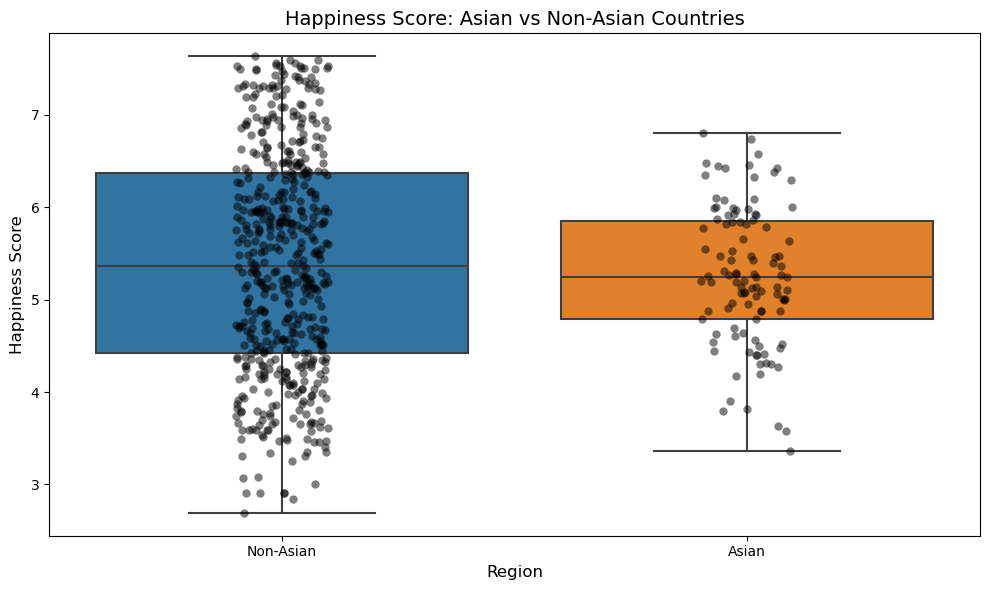

In [55]:
# rough visualization/bar graph
plt.figure(figsize=(10, 6))

# box plot to see distribution of happiness scores between both regions
sns.boxplot(x='Asian', y='Happiness Score', data=df_clean)

# dot plot for individual countries' happiness scores
sns.stripplot(x='Asian', y='Happiness Score', data=df_clean, 
              color='black', alpha=0.5, jitter=True, dodge=False, size=6)

# title and labels
plt.title('Happiness Score: Asian vs Non-Asian Countries', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# adjust layout and show plot
plt.tight_layout()
plt.show()

The boxplot shows that Non-Asian countries have a slightly higher median happiness score than Asian countries. However, there is more variability in the Non-Asian scores, as shown in the wider interquartile range. This may indicate that happiness factors are more heterogeneous outside of Asia. However, this is probably a consequence of the sample size imbalance between them. Let's see the mean trend in happiness scores, independent from one another.

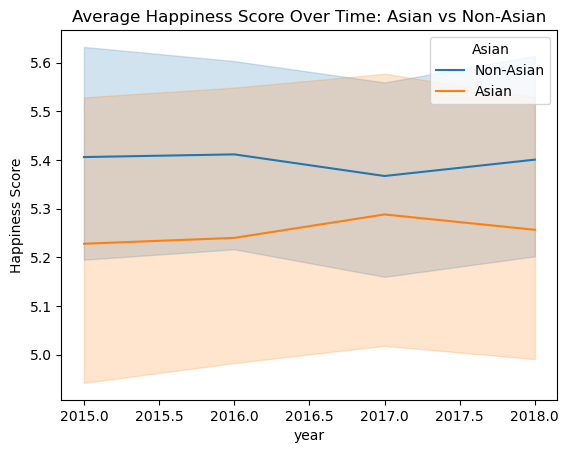

In [56]:
# lineplot of the average happiness score between Asian and non-Asian countries
sns.lineplot(data=df_clean, x='year', y='Happiness Score', hue='Asian')
plt.title('Average Happiness Score Over Time: Asian vs Non-Asian')
plt.ylabel('Happiness Score')
plt.show()

The line plot illustrates the means of the data, where Asian countries consistently had a slightly lower average happiness score than non-Asian countries. Consistent with earlier observations, the Non-Asian countries had more extreme scores than their Asian counterparts. This graph serves to illustrate that difference even more. However, we are more interested in the dominant factors that make the countries in these regions report higher happiness scores, rather than focusing solely on the average happiness of the regions.

<function matplotlib.pyplot.show(close=None, block=None)>

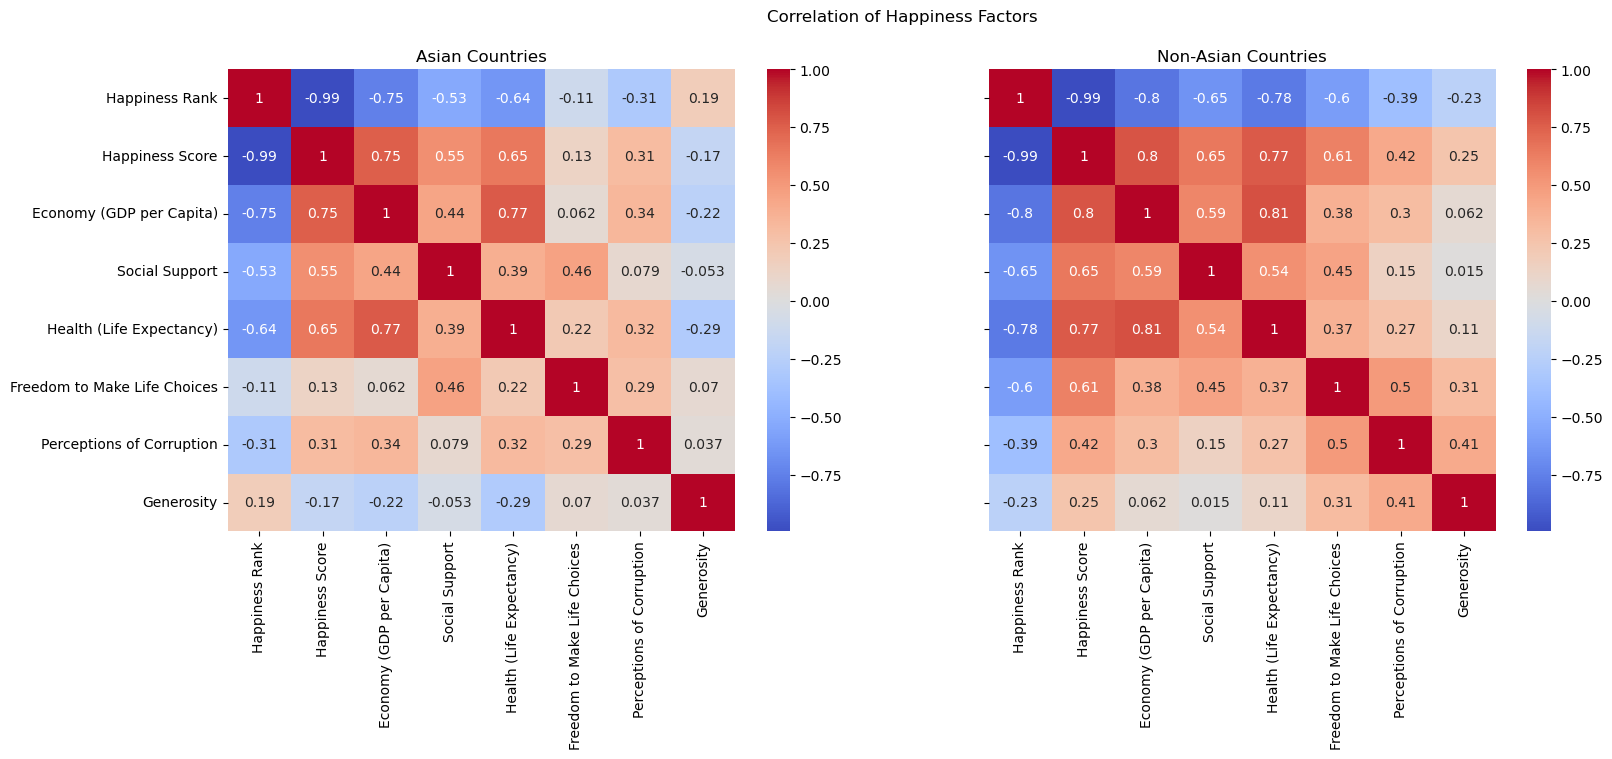

In [57]:
# create Asian/non-Asian subsets
df_asian = df_clean[df_clean['Asian'] == 'Asian']
df_nonasian = df_clean[df_clean['Asian'] == 'Non-Asian']

# columns to be correlated
cols = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Social Support',
        'Health (Life Expectancy)', 'Freedom to Make Life Choices', 'Perceptions of Corruption',
        'Generosity']

# correlation matrices of factors to happiness score
correlation_asian = df_asian[cols].corr()
correlation_nonasian = df_nonasian[cols].corr()

# heatmap of correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(18,6), sharey=True)

sns.heatmap(correlation_asian,annot=True,cmap='coolwarm',center=0, ax=axes[0])
axes[0].set_title('Asian Countries')

sns.heatmap(correlation_nonasian,annot=True,cmap='coolwarm',center=0,ax=axes[1])
axes[1].set_title('Non-Asian Countries')

plt.suptitle('Correlation of Happiness Factors')
plt.show

For the most part, most of the factors are correlated similarly between the two regions. However, there are two that are greatly different between non-Asian and Asian countries: "Freedom to Make Life Choices" and "Generosity." In non-Asian countries, freedom to make life choices has a fairly positive correlation with happiness (0.61), whereas Asian countries had a much weaker correlation (0.13). Furthermore, generosity in non-Asian countries exhibits a weak (positive) correlation of 0.25, contrary to the weak (but NEGATIVE) correlation of -0.22 in Asian countries.

The difference in freedom suggests that an individual's perceived autonomy plays a significant role in one's overall well-being in non-Asian countries. This is in contrast with the weaker correlation in Asian countries, where it suggests that it may not be as important, pointing to cultural differences. Furthermore, the differences in generosity suggest a contrast in societal norms within the two regions or the role/importance of generosity in a collectivist vs. individualist society.

These differing correlations indicate that some drivers of happiness are not consistent worldwide and that different cultural and socioeconomic factors shape these discrepancies. These trends need to be explored further.

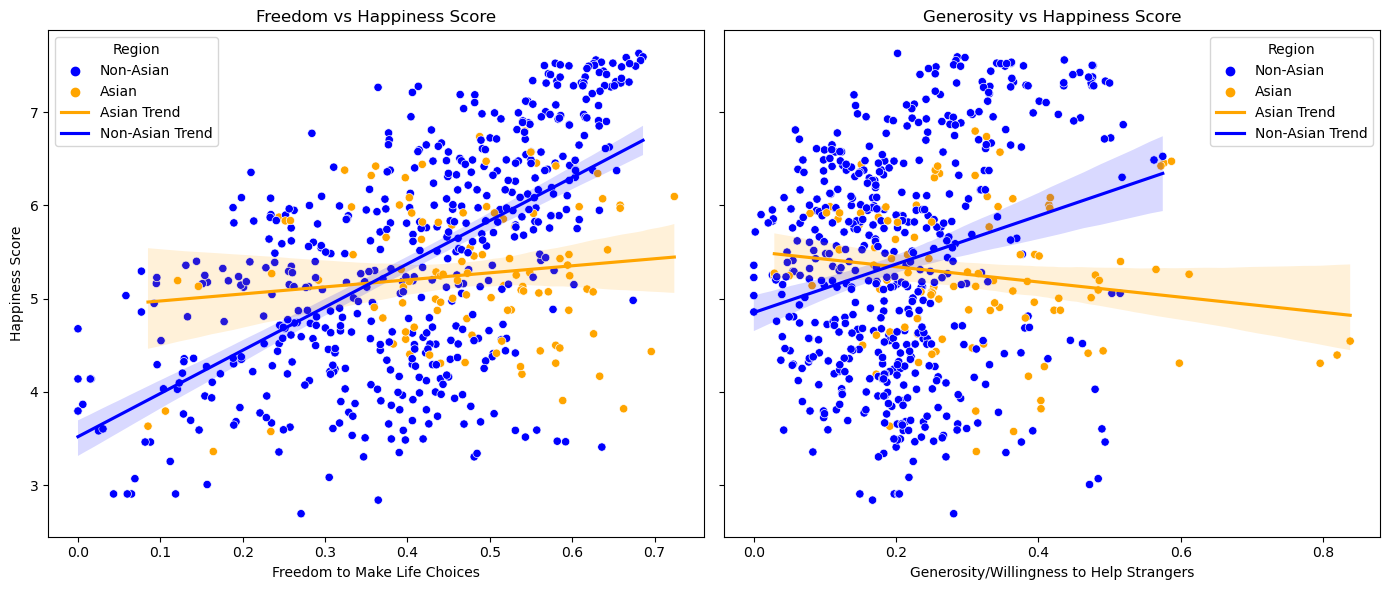

In [58]:
# Make plot to see freedom:happiness and generosity:happiness
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# color palette
asian_nonasian_colors = {'Asian':'orange', 'Non-Asian':'blue'}

# Plot 1: Freedom to Make Life Choices vs Happiness
sns.scatterplot(
    data=df_clean,
    x='Freedom to Make Life Choices',
    y='Happiness Score',
    hue='Asian',
    palette=asian_nonasian_colors,
    ax=axes[0]
)
sns.regplot(
    data=df_clean[df_clean['Asian'] == 'Asian'],
    x='Freedom to Make Life Choices',
    y='Happiness Score',
    scatter=False,
    ax=axes[0],
    color='orange',
    label='Asian Trend'
)
sns.regplot(
    data=df_clean[df_clean['Asian'] == 'Non-Asian'],
    x='Freedom to Make Life Choices',
    y='Happiness Score',
    scatter=False,
    ax=axes[0],
    color='blue',
    label='Non-Asian Trend'
)
axes[0].set_title('Freedom vs Happiness Score')
axes[0].set_xlabel('Freedom to Make Life Choices')
axes[0].legend(title='Region')

# Plot 2: Generosity vs Happiness
sns.scatterplot(
    data=df_clean,
    x='Generosity',
    y='Happiness Score',
    hue='Asian',
    palette=asian_nonasian_colors,
    ax=axes[1]
)
sns.regplot(
    data=df_clean[df_clean['Asian'] == 'Asian'],
    x='Generosity',
    y='Happiness Score',
    scatter=False,
    ax=axes[1],
    color='orange',
    label='Asian Trend'
)
sns.regplot(
    data=df_clean[df_clean['Asian'] == 'Non-Asian'],
    x='Generosity',
    y='Happiness Score',
    scatter=False,
    ax=axes[1],
    color='blue',
    label='Non-Asian Trend'
)
axes[1].set_title('Generosity vs Happiness Score')
axes[1].set_xlabel('Generosity/Willingness to Help Strangers')
axes[1].legend(title='Region')

# Adjust spacing
plt.tight_layout()
plt.show()


There is a big difference in the distribution of data for Asian/Non-Asian countries for both "Freedom to Make Life Choices" and "Generosity." This data suggests that Asian countries are not as influenced by their ability to make choices in life as opposed to non-Asian countries. Furthermore, the data indicates that Asian countries have a negative relationship with generosity and happiness levels, whereas non-Asian countries have a positive one.

Possible interpretations: 

 - In many Western/non-Asian societies, freedom/autonomy for oneself is a core value, so people may have a higher sensitivity for happiness when they perceive this control over their life decisions. In collectivist nations, conforming to social expectations or roles within familial or communal groups may be more important than autonomy, which can dampen the effect of this variable on a person's happiness.

 - Similarly, generosity (typically measured through volunteering or donating) may be seen as a duty and obligation--a trait that is expected--in Asian countries. This may add pressure to them or reduce the emotional reward that comes with fulfilling this task. On the contrary, generosity may reflect an individual's prosperity--their ability to help others due to excess wealth or time--contributing to a higher well-being.




In [59]:
# report means of both categories from the regions
asian_gen_mean = df_asian['Generosity'].mean()
nonasian_gen_mean = df_nonasian['Generosity'].mean()

asian_free_mean = df_asian['Freedom to Make Life Choices'].mean()
nonasian_free_mean = df_nonasian['Freedom to Make Life Choices'].mean()

print(f"Asian Generosity Mean: {asian_gen_mean:.3f}")
print(f"Non-Asian Generosity Mean: {nonasian_gen_mean:.3f}\n")

print(f"Asian Freedom to Make Life Choices Mean: {asian_free_mean:.3f}")
print(f"Non-Asian Freedom to Make Life Choices Mean: {nonasian_free_mean:.3f}")

# t-test and p-values of Generosity and Freedom, respectively

asian_gen = df_asian['Generosity']
nonasian_gen = df_nonasian['Generosity']

t_stat_gen, p_val_gen = ttest_ind(asian_gen, nonasian_gen, equal_var=False)
print(f"Generosity t-statistic: {t_stat_gen:.4f}, p-value: {p_val_gen:.12f}")

# Repeat for "Freedom"

asian_free = df_asian['Freedom to Make Life Choices']
nonasian_free = df_nonasian['Freedom to Make Life Choices']

t_stat_free, p_val_free = ttest_ind(asian_free, nonasian_free, equal_var=False)
print(f"Freedom to Make Life Choices t-statistic: {t_stat_free:.4f}, p-value: {p_val_free:.8f}")

Asian Generosity Mean: 0.310
Non-Asian Generosity Mean: 0.210

Asian Freedom to Make Life Choices Mean: 0.468
Non-Asian Freedom to Make Life Choices Mean: 0.405
Generosity t-statistic: 6.2803, p-value: 0.000000004698
Freedom to Make Life Choices t-statistic: 4.3919, p-value: 0.00001925


Even though Asian countries report higher levels of both "Generosity" and "Freedom to Make Life Choices", the t-tests and p-values indicate that these differences are statistically significant. However, the regression lines in our previous scatterplots suggest that the relationship between the two factors and happiness differs across the regions. 

In [63]:
df_asian.columns

Index(['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom to Make Life Choices',
       'Generosity', 'Perceptions of Corruption', 'year', 'Region', 'Asian'],
      dtype='object')

In [68]:
# rename columns in df to avoid spaces before model
df_asian = df_asian.rename(columns={
    'Happiness Score': 'Happiness_Score',
    'Freedom to Make Life Choices': 'Freedom_to_Make_Life_Choices'
})

df_nonasian = df_nonasian.rename(columns={
    'Happiness Score': 'Happiness_Score',
    'Freedom to Make Life Choices': 'Freedom_to_Make_Life_Choices'
})

# regression for Asian countries
model_asian = smf.ols("Happiness_Score ~ Generosity + Freedom_to_Make_Life_Choices", data=df_asian).fit()

# regression for Non-Asian countries
model_non_asian = smf.ols("Happiness_Score ~ Generosity + Freedom_to_Make_Life_Choices", data=df_nonasian).fit()

print("Asian countries regression results:\n", model_asian.summary())

Asian countries regression results:
                             OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.705
Date:                Tue, 27 May 2025   Prob (F-statistic):             0.0716
Time:                        22:24:11   Log-Likelihood:                -117.29
No. Observations:                 107   AIC:                             240.6
Df Residuals:                     104   BIC:                             248.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

The linear regression model above examines the relationship between Happiness Score and the two predictors: Generosity and Freedom to Make Life Choices in Asian countries.

Interpretations of Model:
- Model is not statistically significant at the alpha level of 0.05, with an F-statistic of 2,705 (p = 0.0716).
- R-squared value = 0.049, indicating a ~4.9% of the changes in happiness scores is explained by these social factors.
- Coefficient for Generosity is -0.8631 (p = 0.063) suggests a negative correlation between generosity and happiness, as found earlier. This is slightly significant, but below the threshold of 0.05.
- Coefficient for Freedom to Make Life Choices is 0.8279 (p = 0.138) suggests a positive correlation between Freedom and Happiness, as seen earlier. This p-value suggests a statistically insignificant relationship with happiness.

Neither generosity or freedom have a significant effect on determining the happiness score of Asian nations as indicated by the model.

In [69]:
# print regression model for non-Asian countries

print("Non-Asian countries regression results:\n", model_non_asian.summary())

Non-Asian countries regression results:
                             OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 27 May 2025   Prob (F-statistic):           6.25e-54
Time:                        22:24:54   Log-Likelihood:                -705.17
No. Observations:                 519   AIC:                             1416.
Df Residuals:                     516   BIC:                             1429.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

The linear regression model above examines the relationship between Happiness Score and the two predictors: Generosity and Freedom to Make Life Choices in Non-Asian countries.

Interpretations of Model:
- Model is statistically significant at the alpha level of 0.05, with an F-statistic of 156.8 (p < 0.00001). This suggests that the combination of the predictors is meaningful for a country's happiness level in the region. 
- R-squared value = 0.378, indicating a ~37.8% of the changes in happiness scores is explained by these social factors.
- Coefficient for Generosity is 0.6566 (p = 0.09) suggests a positive correlation between generosity and happiness. However, the p-value indicates that this is not statistically significant at the 0.05 level.
- Coefficient for Freedom to Make Life Choices is 4.4904 (p ~ 0.000) suggests a significantly positive correlation between Freedom and Happiness, as seen earlier. This p-value suggests an extremely strong relationship with happiness.

Freedom to make life choices is a very strong (statistically significant) predictor of happiness in non-Asian countries, as indicated by the model.

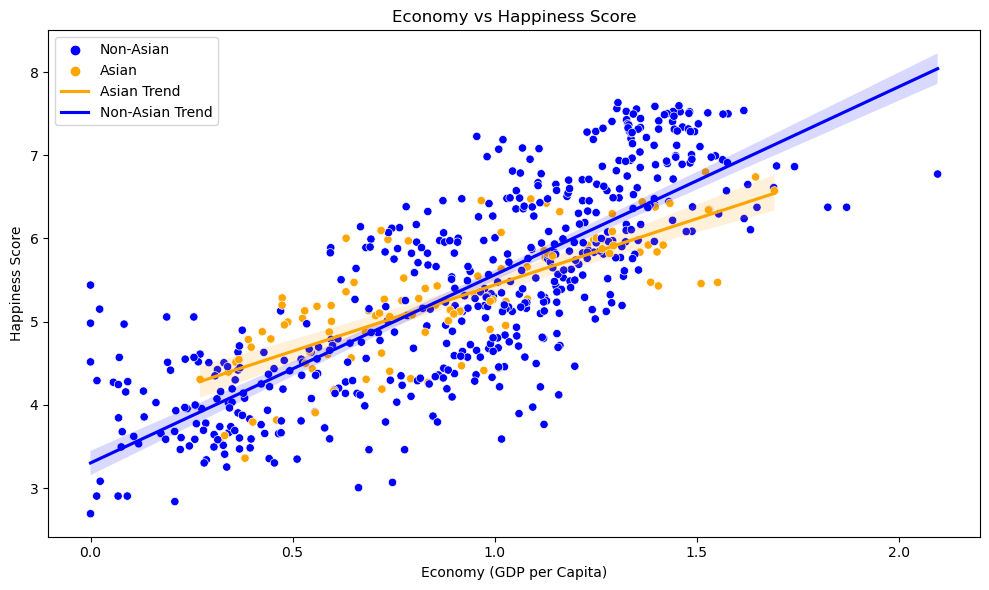

In [22]:
plt.figure(figsize=(10, 6))

# Scatter plot with hue (economy:happiness score)
sns.scatterplot(
    data=df_clean,
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    hue='Asian',
    palette=asian_nonasian_colors
)

# Regression lines for Asian and Non-Asian groups
sns.regplot(
    data=df_clean[df_clean['Asian'] == 'Asian'],
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    scatter=False,
    color='orange',
    label='Asian Trend'
)
sns.regplot(
    data=df_clean[df_clean['Asian'] == 'Non-Asian'],
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    scatter=False,
    color='blue',
    label='Non-Asian Trend'
)

# Titles and labels
plt.title('Economy vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.legend()

plt.tight_layout()
plt.show()

This graph shows us the relationship between GDP per capita and the country's corresponding happiness score. It is divided by Asian and non-Asian countries. We can see that the slope for the Non-Asian trend is slightly steeper. This means that on average, an increase of GDP per capita is associated with a higher increase in happiness score (in comparison to Asian countries).

Possible Interpretations:
* Non-Asians may place a higher value on monetary values and therefore it affects their happiness more.
* OR this difference might just be due to random chance (as there isn't a very large difference)

### Relationship Between Educational Attainment and Happiness Scores

Let's see how much different countries value their education, and how it ties to their happiness levels.

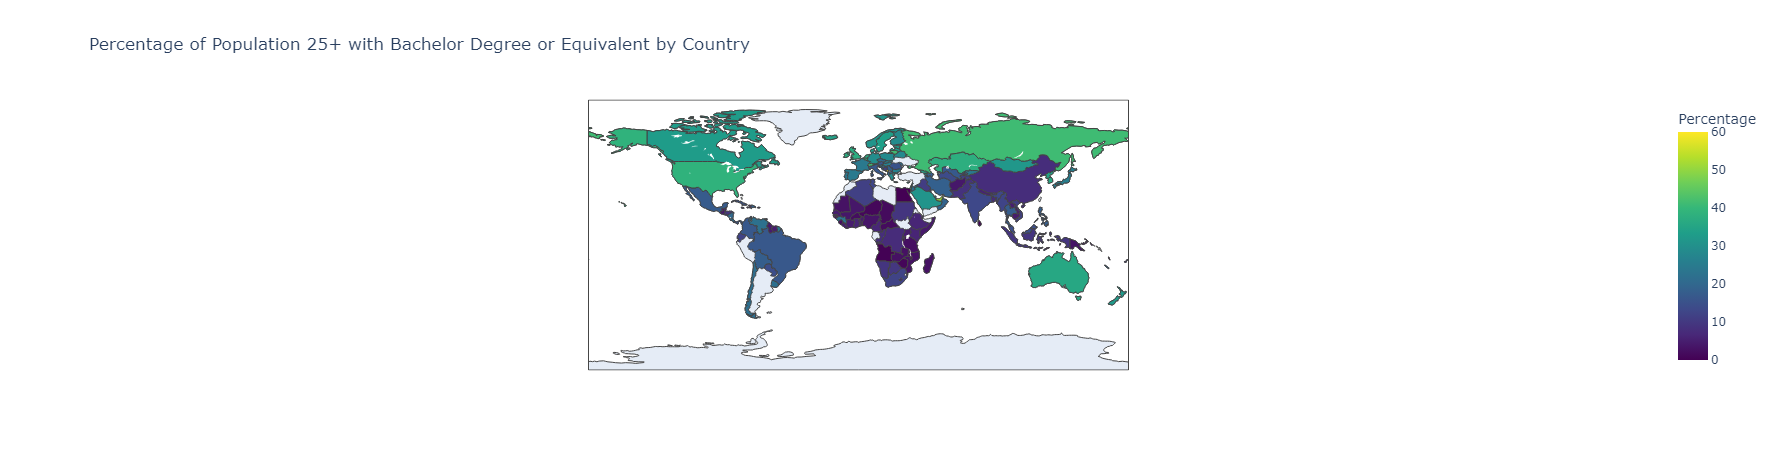

In [27]:
# create a choropleth map/visualization of educational attainment
fig = px.choropleth(education_df,
                    locations='Country',
                    locationmode='country names',
                    color='Percentage',
                    color_continuous_scale='Viridis',
                    range_color=(0,60),
                    title='Percentage of Population 25+ with Bachelor Degree or Equivalent by Country')

fig.show()

# display for GitHub preview
display(Image("education_map.png"))

From our graphs, we can see that the majority of Asian countries have pretty medium levels of the population who have a Bachelors degree. While there seem to be pretty high percentages (in the green zone) for North America, and lower percentages (purple) for Africa, Asia tends to have a big range between lower and high percentages (ranging in colors from purple to green). 

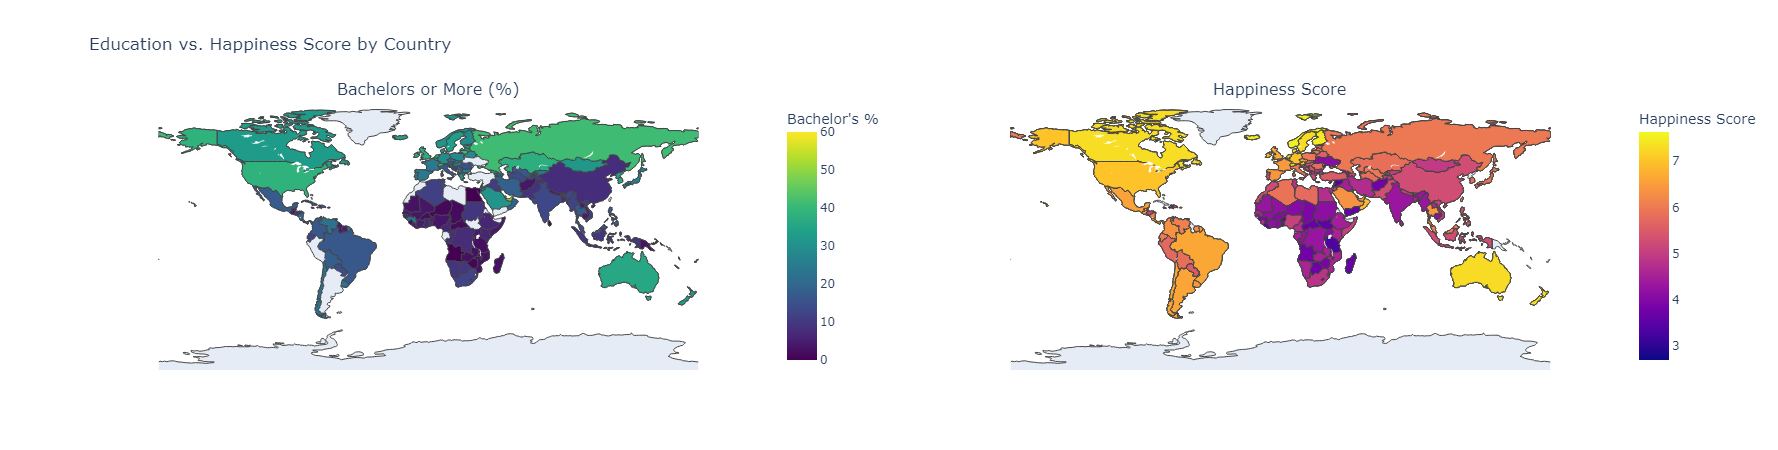

In [28]:
# get the means from the happiness df
mean_happiness_df = df_clean.groupby(['Country','Asian','Economy (GDP per Capita)'],as_index=False)['Happiness Score'].mean()

# create subplot layout
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Bachelors or More (%)", "Happiness Score"],
    specs=[[{"type":"choropleth"}, {"type":"choropleth"}]],
    horizontal_spacing=0.1
)

# add education choropleth
fig.add_trace(
    go.Choropleth(
        locations=education_df['Country'],
        locationmode='country names',
        z=education_df['Percentage'],
        colorscale='Viridis',
        zmin=0, zmax=60,
        colorbar=dict(title='Bachelor\'s %', x=0.45),
    ),
    row=1, col=1
)

# add happiness score choropleth
fig.add_trace(
    go.Choropleth(
        locations=mean_happiness_df['Country'],
        locationmode='country names',
        z=mean_happiness_df['Happiness Score'],
        colorscale='Plasma',
        zmin=mean_happiness_df['Happiness Score'].min(),
        zmax=mean_happiness_df['Happiness Score'].max(),
        colorbar=dict(title='Happiness Score', x=1.0)
    ),
    row=1, col=2
)

# update the layout
fig.update_layout(
    title_text='Education vs. Happiness Score by Country',
    geo=dict(showframe=False),
    geo2=dict(showframe=False)
)

fig.show()

# display graph for GitHub
display(Image("education_happiness_map.png"))

Now let's see how these education levels tie to happiness levels. 

From these graphs, there generally seems to be a positive correlation between education levels and happiness levels. For example, the countries that are green on the left graph seem to be high in happiness as well on the right graph (orange to yellow colored). This seems to be a common trend amongst Asian and non-Asian countries as well.

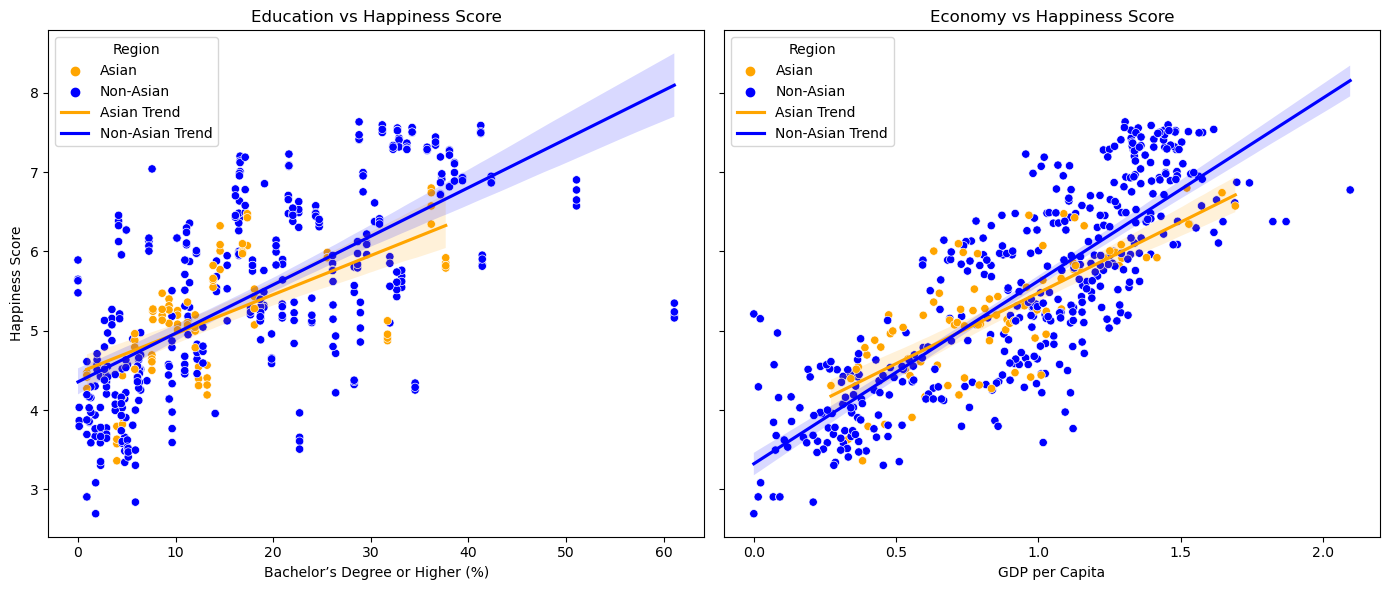

In [29]:
# merge happiness, economy, and education data by country
merged_df = pd.merge(mean_happiness_df, education_df, on='Country', how='inner')

# color palette to match previous graphs
color_palette = {'Asian':'orange', 'Non-Asian':'blue'}

# set up figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# plot 1: Education and Happiness
sns.scatterplot(
    data=merged_df,
    x='Percentage',
    y='Happiness Score',
    hue='Asian',
    palette=color_palette,
    ax=axes[0]
)
sns.regplot(
    data=merged_df[merged_df['Asian'] == 'Asian'],
    x='Percentage',
    y='Happiness Score',
    scatter=False,
    ax=axes[0],
    color='orange',
    label='Asian Trend'
)
sns.regplot(
    data=merged_df[merged_df['Asian'] == 'Non-Asian'],
    x='Percentage',
    y='Happiness Score',
    scatter=False,
    ax=axes[0],
    color='blue',
    label='Non-Asian Trend'
)
axes[0].set_title('Education vs Happiness Score')
axes[0].set_xlabel('Bachelor’s Degree or Higher (%)')
axes[0].legend(title='Region')

# plot 2: Economy and Happiness
sns.scatterplot(
    data=merged_df,
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    hue='Asian',
    palette=color_palette,
    ax=axes[1]
)
sns.regplot(
    data=merged_df[merged_df['Asian'] == 'Asian'],
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    scatter=False,
    ax=axes[1],
    color='orange',
    label='Asian Trend'
)
sns.regplot(
    data=merged_df[merged_df['Asian'] == 'Non-Asian'],
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    scatter=False,
    ax=axes[1],
    color='blue',
    label='Non-Asian Trend'
)
axes[1].set_title('Economy vs Happiness Score')
axes[1].set_xlabel('GDP per Capita')
axes[1].legend(title='Region')

# adjust spacing
plt.tight_layout()
plt.show()

We can see these past graphs in a more numerical sense. Both have a positive slopes. This means there is a positive association between:
* GDP per capita and happiness score
* Percentage of 25+ year olds who have a  bachelor's degree or higher and hapiness score

While we plotted both Asian and non-Asian populations, we can see that they tend to have very similar regression lines with similar slopes. Because there seem to be similar patterns, there must also be a pattern between education and economy.

Text(0.5, 28.999999999999986, "% of Population with Bachelor's degree or Equivalent")

<Figure size 1000x600 with 0 Axes>

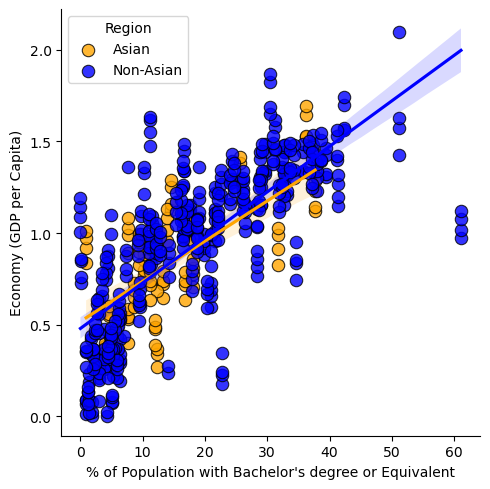

In [30]:
# Another plot to see correlation between Education and Economy
plt.figure(figsize=(10,6))
edu_happiness_scatter_plot = sns.lmplot(
    data=merged_df,
    x='Percentage',
    y='Economy (GDP per Capita)',
    hue='Asian',
    palette=color_palette,
    scatter_kws={'s':80, 'edgecolor':'black', 'linewidths':0.8},
    legend=False
)
plt.legend(title='Region')
plt.xlabel('% of Population with Bachelor\'s degree or Equivalent')

We can see that there is a very positive association between education and economy. Therefore, it makes sense that there is a very similar relationship between education/happiness and economy/happins

# Ethics & Privacy

- With the way our research question is phrased (happiness as our main variable), there could be a lot of variability and subjectivity within our measures. There is a risk of imposing Western definitions of “well-being” onto countries with drastically different cultural factors. This can be an ethical concern when comparing cultures.
    - To address it, we utilized a dataset that includes a wide range of “happiness drivers” to adequately compare nations fairly, acknowledging cultural differences, but giving us many variables--economic, social, and health-related factors--to compare our findings.
- With large survey datasets, there may be an underrepresentation of developing countries while overrepresenting high-income countries. Furthermore, sampling bias is something that may be difficult to address if citizens in a specific country underreport their happiness due to social standards, as opposed to another country overreporting. There may also be a bias when reaching out to rural communities in these countries, as surveys are typically conducted electronically.
    - To address this issue, we will make note of our data’s limitations, and make sure not to make generalizations about Asia or specific countries as a whole. We will document any limitations and statistical adjustments like population weighting may be used to account for misrepresentation.
- Our findings may be misused for political purposes, where stereotypes can be made about different cultures that may be found to be less “happy” or unable to achieve happiness.
    - To address this, our data will not be used to rank countries, rather, it will be used to acknowledge the differences in what makes a country happy in Asia, compared to the rest of the world.
- We are utilizing publicly accessible, voluntary, aggregated, and anonymized datasets collected through consent-based survey in the World Gallup Poll and WorldData.org.

__Issue:__ Be more specific about handling biases, analyzing differences in subgroups, etc.; mention that we are using anonymized, voluntary, and publicly available surveys.

__Resolution__: More specific in how we will handle biases and analyze differences; added statement about how the surveys are publicly accessible, voluntary, aggregated, and anonymized.

# Team Expectations 


* We agree to communicate regularly through our group chat and check in at least twice a week. We will respond to messages in a timely manner.
* Each team member will complete their assigned tasks on time. If something comes up or anyone needs help, they will let the group know early. 
* We will be respectful of each other. If conflicts arise, we'll talk it out in a calm, honest way and ensure everyone feels heard. 


# Project Timeline Proposal



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/22  |  5 PM | Decide what project topic to do + finalize main form of communication | Project Review | 
| 4/29  |  2 PM |  Completed project review | Finalize project idea + complete Project Proposal | 
| 5/12  | 3 PM  | Background research on topic; find potential datasets | Discuss Wrangling and possible analytical approaches; assign group members to lead each specific part |
| 5/14  | 3 PM  | Wrangle and clean data; revise and read over each section | Continue revising places where points were lost; Complete data checkpoint #1; discuss/edit analysis |
| 5/23  | 11 AM  | Edit wrangling/draft EDA; draft results/conclusions | Complete EDA; discuss/edit/record final project |
| 5/30 | 11 AM | Edit final project & video | Review final project + video |
| 6/11  | Before 11:59 PM  | Finish project + video | Turn in Final Project & Group Project Surveys |